# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)
Daniel Sherman Project 1 Part 1

## Introduction/Background
 For this project I will be taking a hugging face IMDB reviews dataset. With the reviews I plan on using binary classification of the language used in each review to determine/predict whether they are positive or negative towards the movie. Below is a link to the dataset.
 
 https://huggingface.co/datasets/imdb


## Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [114]:
# import all of the python modules/packages you'll need here
import pandas as pd
from datasets import load_dataset
import datasets #huggingface datasets
import nltk #natural language tool kit

#myDataSet = load_dataset("imdb")

#load datasets split into training and testing data
myTrainData_ds = load_dataset("imdb",split="train")
myTestData_ds = load_dataset("imdb", split="test")
#convert datasets to pandas dataframes
myTrainData_df = pd.DataFrame(myTrainData_ds)
myTestData_df = pd.DataFrame(myTestData_ds)
myTrainData_df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [115]:
myTestData_df.head()

,text,label
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0


In [116]:
myTestData_df.label.value_counts(normalize=True) #exploratory analysis

0    0.5
1    0.5
Name: label, dtype: float64

In [117]:
myTrainData_df.label.value_counts(normalize=True) #exploratory analysis

0    0.5
1    0.5
Name: label, dtype: float64

In [118]:
myTestData_df.dtypes #exploratory analysis

text     object
label     int64
dtype: object

In [119]:
#introduce stopwords and common characters to increase value of tokens when tokenizing
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
chars2remove = set([',','!','/','?','"','#',':','.','\'','<','>','(',')'])
print("done")

done


In [120]:
#tokenize data
myTrainData_df['tokens'] = myTrainData_df['text'].apply(lambda x: nltk.word_tokenize(x))
myTrainData_df.head()

,text,label,tokens
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,"[I, rented, I, AM, CURIOUS-YELLOW, from, my, v..."
1,"""I Am Curious: Yellow"" is a risible and preten...",0,"[``, I, Am, Curious, :, Yellow, '', is, a, ris..."
2,If only to avoid making this type of film in t...,0,"[If, only, to, avoid, making, this, type, of, ..."
3,This film was probably inspired by Godard's Ma...,0,"[This, film, was, probably, inspired, by, Goda..."
4,"Oh, brother...after hearing about this ridicul...",0,"[Oh, ,, brother, ..., after, hearing, about, t..."


In [121]:
#refine tokenization to remove stopwords and common characters
myTrainData_df['tokens'] = myTrainData_df['tokens'].apply(lambda x: [w for w in x if w not in stops])
myTrainData_df['tokens'] = myTrainData_df['tokens'].apply(lambda x: [w for w in x if w not in chars2remove])
myTrainData_df.head()

,text,label,tokens
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,"[I, rented, I, AM, CURIOUS-YELLOW, video, stor..."
1,"""I Am Curious: Yellow"" is a risible and preten...",0,"[``, I, Am, Curious, Yellow, '', risible, pret..."
2,If only to avoid making this type of film in t...,0,"[If, avoid, making, type, film, future, This, ..."
3,This film was probably inspired by Godard's Ma...,0,"[This, film, probably, inspired, Godard, 's, M..."
4,"Oh, brother...after hearing about this ridicul...",0,"[Oh, brother, ..., hearing, ridiculous, film, ..."


In [122]:
# https://www.nltk.org/install.html
# https://www.nltk.org/data.html
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# do in Kaggle console to make it work online

# lemmatize to increase standardization of tokenized data for better model training
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
myTrainData_df['tokens'] = myTrainData_df['tokens'].apply(lambda x: [lemmatizer.lemmatize(w, pos="v") for w in x])
myTrainData_df.head()

,text,label,tokens
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,"[I, rent, I, AM, CURIOUS-YELLOW, video, store,..."
1,"""I Am Curious: Yellow"" is a risible and preten...",0,"[``, I, Am, Curious, Yellow, '', risible, pret..."
2,If only to avoid making this type of film in t...,0,"[If, avoid, make, type, film, future, This, fi..."
3,This film was probably inspired by Godard's Ma...,0,"[This, film, probably, inspire, Godard, 's, Ma..."
4,"Oh, brother...after hearing about this ridicul...",0,"[Oh, brother, ..., hear, ridiculous, film, ump..."


In [123]:
#split data into positive and negative sets
myTrainingPos = myTrainData_df[myTrainData_df['label'] == 1]
myTrainingNeg = myTrainData_df[myTrainData_df['label'] == 0]
myTrainingPos.head()

,text,label,tokens
12500,Zentropa has much in common with The Third Man...,1,"[Zentropa, much, common, The, Third, Man, anot..."
12501,Zentropa is the most original movie I've seen ...,1,"[Zentropa, original, movie, I, 've, see, years..."
12502,Lars Von Trier is never backward in trying out...,1,"[Lars, Von, Trier, never, backward, try, new, ..."
12503,*Contains spoilers due to me having to describ...,1,"[*, Contains, spoilers, due, describe, film, t..."
12504,That was the first thing that sprang to mind a...,1,"[That, first, thing, spring, mind, I, watch, c..."


In [124]:
myTrainingNeg.head() 

,text,label,tokens
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,"[I, rent, I, AM, CURIOUS-YELLOW, video, store,..."
1,"""I Am Curious: Yellow"" is a risible and preten...",0,"[``, I, Am, Curious, Yellow, '', risible, pret..."
2,If only to avoid making this type of film in t...,0,"[If, avoid, make, type, film, future, This, fi..."
3,This film was probably inspired by Godard's Ma...,0,"[This, film, probably, inspire, Godard, 's, Ma..."
4,"Oh, brother...after hearing about this ridicul...",0,"[Oh, brother, ..., hear, ridiculous, film, ump..."


In [125]:
#Code modified from sgeinitz/cs39aa_notebooks nb_C_airline_tweets_take2.ipynb

#create vocabulary for use with training model, allow for sorting by most common and removing least common for
# model optimization
def make_vocab_list(tokens_column):
    vocab = dict()
    for myTokens in tokens_column:
        for token in myTokens:
            if token not in vocab:
                vocab[token] = 1
            else:
                vocab[token] += 1
    return vocab
myVocabAll = dict(sorted(make_vocab_list(myTrainData_df['tokens']).items(), key=lambda item: item[1], reverse=True))
myVocabPos = dict(sorted(make_vocab_list(myTrainingPos['tokens']).items(), key=lambda item: item[1], reverse=True))
myVocabNeg = dict(sorted(make_vocab_list(myTrainingNeg['tokens']).items(), key=lambda item: item[1], reverse=True))

print(f"number of unique tokens overall: {len(myVocabAll)}, pos tokens: {len(myVocabNeg)}, neg: {len(myVocabNeg)}")

number of unique tokens overall: 121163, pos tokens: 79879, neg: 79879


In [126]:
list(myVocabAll.items())[:20]

[('br', 101870),
 ('I', 81531),
 ("'s", 61984),
 ('film', 45995),
 ('The', 43999),
 ('movie', 41964),
 ("n't", 33220),
 ("''", 33133),
 ('``', 32853),
 ('one', 23564),
 ('make', 22202),
 ('like', 21032),
 ('see', 19928),
 ('It', 18185),
 ('get', 17660),
 ('time', 14820),
 ('This', 14756),
 ('good', 14027),
 ('character', 13704),
 ('would', 13222)]

In [127]:
list(myVocabPos.items())[:20]

[('br', 49234),
 ('I', 37754),
 ("'s", 32043),
 ('film', 24200),
 ('The', 21949),
 ('movie', 18256),
 ("''", 16025),
 ('``', 15671),
 ("n't", 13370),
 ('one', 12015),
 ('see', 10383),
 ('make', 10146),
 ('like', 9566),
 ('It', 9462),
 ('get', 8067),
 ('time', 7712),
 ('This', 7563),
 ('good', 7084),
 ('character', 6833),
 ('story', 6311)]

In [128]:
list(myVocabNeg.items())[:20]

[('br', 52636),
 ('I', 43777),
 ("'s", 29941),
 ('movie', 23708),
 ('The', 22050),
 ('film', 21795),
 ("n't", 19850),
 ('``', 17182),
 ("''", 17108),
 ('make', 12056),
 ('one', 11549),
 ('like', 11466),
 ('get', 9593),
 ('see', 9545),
 ('It', 8723),
 ('would', 7572),
 ('This', 7193),
 ('time', 7108),
 ('go', 7074),
 ('good', 6943)]

In [129]:
top_tokens_num = 1000
for i, item in enumerate(myVocabAll.items()):
    if i == top_tokens_num:
        break
    if item[0] in myVocabPos:
        del myVocabPos[item[0]]
    if item[0] in myVocabNeg:
        del myVocabNeg[item[0]]
print(f"number of unique tokens overall: {len(myVocabAll)}, pos tokens: {len(myVocabPos)}, neg: {len(myVocabNeg)}")
    

number of unique tokens overall: 121163, pos tokens: 80027, neg: 78879


In [130]:
list(myVocabPos.keys())[:20]

['incredible',
 'Stewart',
 'stun',
 'solid',
 'fascinate',
 'beautifully',
 'sweet',
 'terrific',
 'Kelly',
 'awesome',
 'Smith',
 'rare',
 'animate',
 '7',
 'effective',
 'subtle',
 'City',
 '8',
 'Harry',
 'Jim']

In [131]:
list(myVocabNeg.items())[:20]
list(myVocabNeg.keys())[:10]

['pointless',
 'excuse',
 'redeem',
 'pathetic',
 'laughable',
 'trash',
 'garbage',
 'insult',
 'embarrass',
 'zombie']

In [132]:
#code modified from sgeinitz/cs39aa_notebooks nb_C_airline_tweets_take2.ipynb
classifier_tokens = {"positive": list(myVocabPos.keys())[:], "negative": list(myVocabNeg.keys())[:]}

#sample review
exampleClassify_i = 365
exampleClassify = myTrainData_df.iloc[exampleClassify_i,:]['tokens']
print(f"example of review to classify: \n sentiment = {myTrainData_df.iloc[exampleClassify_i,1]} \n review = {myTrainData_df.iloc[exampleClassify_i,0]}")

posCount = 0
negCount = 0

for j in exampleClassify:
    if j in classifier_tokens['positive']:
        posCount += 1
    elif j in classifier_tokens['negative']:
        negCount += 1

print(f"\n vocab counts: positive = {posCount}, negative = {negCount}")

example of review to classify: 
 sentiment = 0 
 review = There seems to be little in the way of middle ground where Watch On the Rhine is concerned. One either likes it very much, applauding its sincerity, its liberal point of view and fine acting, or else loathes its obvious propaganda, mediocre dialogue, cardboard characters and overall tendentiousness. I fall very much in the latter category, and found the film and play,--concerning the activities of European refugees in Washington during wartime--a crushing bore, worthwhile mostly for the acting, and even then only intermittently. That author Lillian Hellman was on the side of the angels is irrelevant. Her plays were written for people who shared her point of view, and she seldom explored ideas that weren't already held by the author and audience except to point out how dreadful the "other side" is. Even when I find myself in one hundred percent agreement with what she has to say,--as in Rhine--I still can't stand the way she says

i'm here
i'm here too


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

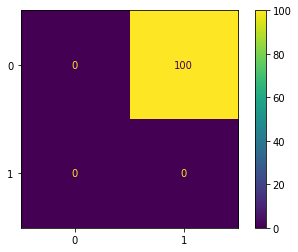

In [133]:
def predict_review_sentiment(review_tokens):
    pos = 0
    neg = 0
    for j in review_tokens:
        if j in classifier_tokens['positive']:
            pos += 1
        elif j in classifier_tokens['negative']:
            neg += 1
    if pos > neg:
        return 1
    else:
        return 0
print("i'm here")
myData_df = myTrainData_df[:100]
myData_df['predicted_label'] = myData_df['tokens'].apply(lambda x: predict_review_sentiment(x))
print("i'm here too")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
disp = ConfusionMatrixDisplay(confusion_matrix(myData_df['label'], myData_df['predicted_label']), display_labels=['negative', 'neutral', 'positive'])
disp.plot()
mod_accuracy = accuracy_score(myTrainData_df['label'], myTrainData_df['predicted_label'])
print(f"our ad hoc model's accuracy on training dataset: {mod_accuracy*100:.2f}%")